In [ ]:
!unzip /content/drive/MyDrive/Fall_Armyworm.zip

Archive:  /content/drive/MyDrive/Fall_Armyworm.zip
   creating: Fall Armyworm/
  inflating: Fall Armyworm/1622093744308.jpg  
  inflating: Fall Armyworm/1622093765449.jpg  
  inflating: Fall Armyworm/1622093771089.jpg  
  inflating: Fall Armyworm/1622093775308.jpg  
  inflating: Fall Armyworm/1622093781865.jpg  
  inflating: Fall Armyworm/1622093786147.jpg  
  inflating: Fall Armyworm/1622093792398.jpg  
  inflating: Fall Armyworm/1622093797121.jpg  
  inflating: Fall Armyworm/1622093801823.jpg  
  inflating: Fall Armyworm/1622093809426.jpg  
  inflating: Fall Armyworm/1622093811630.jpg  
  inflating: Fall Armyworm/1622093813154.jpg  
  inflating: Fall Armyworm/1622093818800.jpg  
  inflating: Fall Armyworm/1622093824238.jpg  
  inflating: Fall Armyworm/1622093825952.jpg  
  inflating: Fall Armyworm/1622093831042.jpg  
  inflating: Fall Armyworm/1622093832408.jpg  
  inflating: Fall Armyworm/1622093832830.jpg  
  inflating: Fall Armyworm/1622093839951.jpg  
  inflating: Fall Armyworm/1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Healthy.zip

Archive:  /content/drive/MyDrive/Healthy.zip
   creating: Healthy/
  inflating: Healthy/1621323098172.jpg  
  inflating: Healthy/1621323110524.jpg  
  inflating: Healthy/1621323119341.jpg  
  inflating: Healthy/1621323143244.jpg  
  inflating: Healthy/1621323146764.jpg  
  inflating: Healthy/1621323159102.jpg  
  inflating: Healthy/1621323164018.jpg  
  inflating: Healthy/1621323182775.jpg  
  inflating: Healthy/1621323189248.jpg  
  inflating: Healthy/1621323197633.jpg  
  inflating: Healthy/1621323207766.jpg  
  inflating: Healthy/1621323218220.jpg  
  inflating: Healthy/1621323241484.jpg  
  inflating: Healthy/1621323250493.jpg  
  inflating: Healthy/1621323265019.jpg  
  inflating: Healthy/1621323280261.jpg  
  inflating: Healthy/1621323281995.jpg  
  inflating: Healthy/1621323318296.jpg  
  inflating: Healthy/1621323344537.jpg  
  inflating: Healthy/1621323366039.jpg  
  inflating: Healthy/1621323378908.jpg  
  inflating: Healthy/1621323380661.jpg  
  inflating: Healthy/1621323400

In [ ]:
!mkdir new_folder


In [ ]:
!mv Fall_Armyworm Dataset

In [ ]:
!mv Healthy Dataset

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import random
import PIL
from PIL import Image
from keras.preprocessing.image import load_img
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
Dataset_Location = "/content/Dataset"

#create Dataframe for Input and Output
input_path = []
label = []

for class_name in os.listdir("/content/Dataset"):
    for path in os.listdir("/content/Dataset/" + class_name):

        if class_name == 'Fall_Armyworm':
            label.append(0)

        else:
            label.append(1)

        input_path.append(os.path.join("/content/Dataset", class_name, path))

print(input_path[0], label[0])



/content/Dataset/Fall_Armyworm/1622098801023.jpg 0


In [ ]:
 len(label)

2868

In [ ]:
 len(input_path)

2868

In [ ]:
df=pd.DataFrame()
df['images'] = input_path
df['label'] = label
df = df.sample(frac=1).reset_index(drop=True)
df.head()

images  label
0        /content/Dataset/Healthy/1621860239395.jpg      1
1  /content/Dataset/Fall_Armyworm/1622094118552.jpg      0
2        /content/Dataset/Healthy/1621403873258.jpg      1
3  /content/Dataset/Fall_Armyworm/1622093887118.jpg      0
4  /content/Dataset/Fall_Armyworm/1622100701206.jpg      0

In [ ]:
df['Class_Name']= np.where(df['label']== 0, 'Fall_Armyworm', 'Healthy')

In [ ]:
 df.head()

images  label     Class_Name
0        /content/Dataset/Healthy/1621860239395.jpg      1        Healthy
1  /content/Dataset/Fall_Armyworm/1622094118552.jpg      0  Fall_Armyworm
2        /content/Dataset/Healthy/1621403873258.jpg      1        Healthy
3  /content/Dataset/Fall_Armyworm/1622093887118.jpg      0  Fall_Armyworm
4  /content/Dataset/Fall_Armyworm/1622100701206.jpg      0  Fall_Armyworm

In [ ]:
# ratio 80/10/10
train_plus_val,test = train_test_split(df, test_size = 0.1,random_state=42)
train,val= train_test_split(train_plus_val,test_size = 0.1,random_state = 42)

In [ ]:
len(train)

2322

In [ ]:
len(test)

287

In [ ]:
len(val)

259

**Data Augmentation and Normalization**

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range = 15,
    rescale = 1.0/255,
    shear_range = 0.1,
    zoom_range = 0.2,
    horizontal_flip = True,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
 )

test_datagen = ImageDataGenerator(rescale = 1./255)

val_datagen = ImageDataGenerator(
    rotation_range = 15,
    rescale = 1.0/255,
    shear_range = 0.1,
    zoom_range = 0.2,
    horizontal_flip = True,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
 )

**VGG16**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from keras.applications.vgg16 import VGG16
from keras.models import Model

In [ ]:
# Specify desired size of image
Image_width =224
Image_height = 224
Image_size = (Image_width,Image_height)
Input_shape = (Image_width, Image_height, 3)


**Training,Testing and Validation Generators**

In [ ]:

Batch_size = 32

train_generator = train_datagen.flow_from_dataframe(
        train,
        directory = None,
        x_col = "images",
        y_col = "Class_Name",
        target_size = Image_size,
        class_mode = "binary",
        batch_size = Batch_size,
        color_mode = "rgb"
)


test_generator = test_datagen.flow_from_dataframe(
         test,
         directory = None,
         x_col = "images",
         y_col = "Class_Name",
         target_size = Image_size,
         class_mode ="binary",
         batch_size = Batch_size,
         color_mode = "rgb",
        shuffle = False

 )


val_generator = val_datagen.flow_from_dataframe(
        val,
        directory = None,
        x_col = "images",
        y_col = "Class_Name",
        target_size = Image_size,
        class_mode = "binary",
        batch_size = Batch_size,
        color_mode = "rgb"

)


Found 2322 validated image filenames belonging to 2 classes.
Found 287 validated image filenames belonging to 2 classes.
Found 259 validated image filenames belonging to 2 classes.


**Loading Pretrained Model**

In [ ]:
pretrained_model = VGG16(input_shape=Input_shape, include_top=False, weights="imagenet")
pretrained_model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

**Freezing the pretrained model lower layers**

In [ ]:
for layer in pretrained_model.layers:
    layer.trainable = False


**bold text**

In [ ]:
# Modification of pretrained model with 0.2 dropout
model = keras.Sequential([
                          pretrained_model,
                          keras.layers.GlobalAveragePooling2D(),
                          keras.layers.Dense(512, activation='relu'),
                          keras.layers.Dropout(0.2),
                          keras.layers.Dense(1, activation='sigmoid')])

In [ ]:
# Creating a new model with 0.01 learning rate and  optimizer
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.01, momentum = 0.9),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 14977857 (57.14 MB)
Trainable params: 263169 (1.00 MB)
Non-trainable params: 14714688 (56.13 MB)
___________

In [ ]:
#Training Model
Epochs = 30
steps_per_epoch = train.shape[0]//Batch_size
validation_steps = val.shape[0]//Batch_size



history = model.fit_generator(train_generator,
                              steps_per_epoch = steps_per_epoch,
                              epochs=Epochs,
                              validation_data=val_generator,
                              validation_steps=validation_steps)

Epoch 1/30
72/72 [==============================] - 1471s 20s/step - loss: 0.5082 - accuracy: 0.7524 - val_loss: 0.3223 - val_accuracy: 0.8984
Epoch 2/30
72/72 [==============================] - 1451s 20s/step - loss: 0.3149 - accuracy: 0.8747 - val_loss: 0.2216 - val_accuracy: 0.9180
Epoch 3/30
72/72 [==============================] - 1456s 20s/step - loss: 0.2586 - accuracy: 0.8969 - val_loss: 0.1789 - val_accuracy: 0.9492
Epoch 4/30
72/72 [==============================] - 1495s 21s/step - loss: 0.2503 - accuracy: 0.8961 - val_loss: 0.1384 - val_accuracy: 0.9570
Epoch 5/30
72/72 [==============================] - 1490s 21s/step - loss: 0.2143 - accuracy: 0.9122 - val_loss: 0.1712 - val_accuracy: 0.9414
Epoch 6/30
72/72 [==============================] - 1499s 21s/step - loss: 0.1947 - accuracy: 0.9218 - val_loss: 0.1366 - val_accuracy: 0.9492
Epoch 7/30
 2/72 [..............................] - ETA: 20:26 - loss: 0.1598 - accuracy: 0.9531

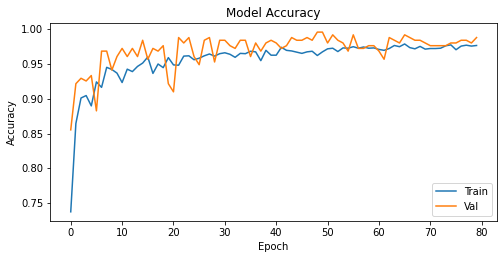

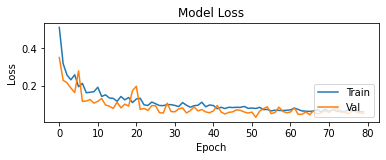

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='lower right')
plt.show()

plt.subplot(2, 1, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='lower right')
plt.show()

In [ ]:
test_accuracy = model.evaluate(test_generator)
print('The testing accuracy is :',test_accuracy[1]*100, '%')

9/9 [==============================] - 12s 1s/step - loss: 0.0488 - accuracy: 0.9826
The testing accuracy is : 98.25783967971802 %


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import itertools

In [ ]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
test_generator.reset()
pred=model.predict_generator(test_generator)

In [ ]:
predictions = pred.copy()
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1

In [ ]:
cm = confusion_matrix(test_generator.classes, predictions)

Confusion matrix, without normalization
[[141   2]
 [  3 141]]


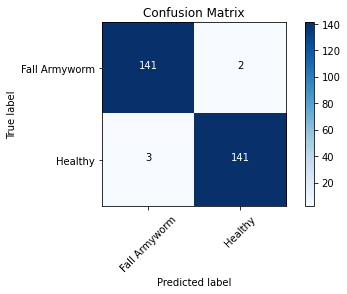

In [ ]:
cm_plot_labels =['Fall Armyworm', 'Healthy']
plot_confusion_matrix(cm=cm, classes = cm_plot_labels, title ='Confusion Matrix')

In [ ]:
print(classification_report(test_generator.classes, predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       143
           1       0.99      0.98      0.98       144

    accuracy                           0.98       287
   macro avg       0.98      0.98      0.98       287
weighted avg       0.98      0.98      0.98       287



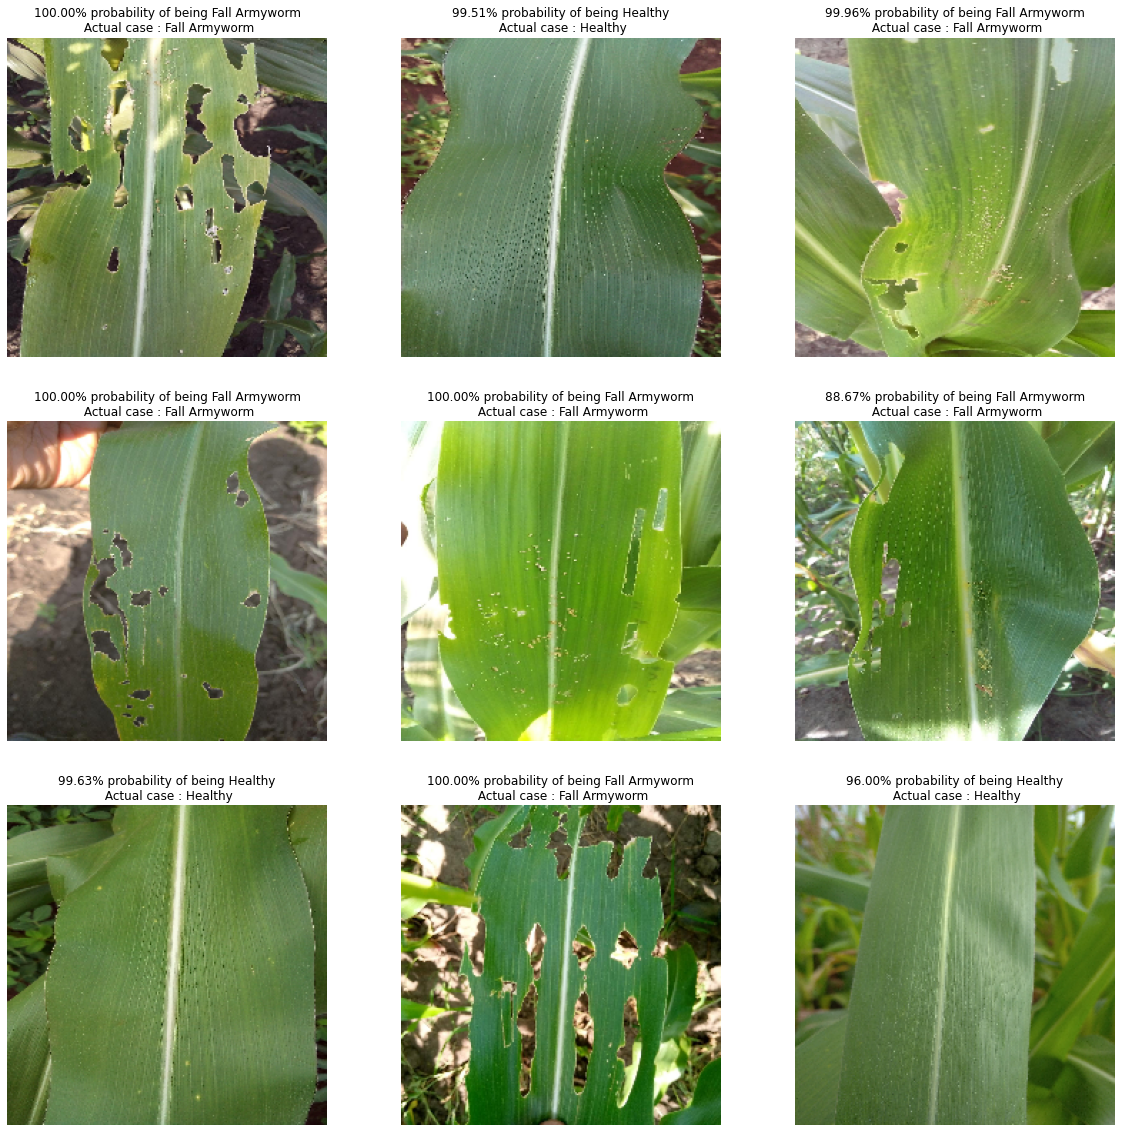

In [ ]:
test_generator.reset()
x=np.concatenate([test_generator.next()[0] for i in range(test_generator.__len__())])
y=np.concatenate([test_generator.next()[1] for i in range(test_generator.__len__())])

#the code above extracts the images from test Data iterator without shuffling the sequence

# x contains image array and y has labels

dic = {0:'Fall Armyworm', 1:'Healthy'}

plt.figure(figsize=(20,20))

for i in range(0+228, 9+228):
    plt.subplot(3, 3, (i-228)+1)
    if pred[i, 0] >= 0.5:
        out = ('{:.2%} probability of being Healthy'.format(pred[i][0]))


    else:
        out = ('{:.2%} probability of being Fall Armyworm'.format(1-pred[i][0]))

    plt.title(out+"\n Actual case : "+ dic.get(y[i]))
    plt.imshow(np.squeeze(x[i]))
    plt.axis('off')
plt.show()

**MobileNetV2**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow import lite
from keras.models import Sequential
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.models import load_model

In [ ]:
# Specify desired size of image
Image_width =224
Image_height = 224
Image_size = (Image_width,Image_height)
Input_shape = (Image_width, Image_height, 3)



In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range = 15,
    rescale = 1.0/255,
    shear_range = 0.1,
    zoom_range = 0.2,
    horizontal_flip = True,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
 )

test_datagen = ImageDataGenerator(rescale = 1./255)

val_datagen = ImageDataGenerator(
    rotation_range = 15,
    rescale = 1.0/255,
    shear_range = 0.1,
    zoom_range = 0.2,
    horizontal_flip = True,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
 )


Batch_size = 32

train_generator = train_datagen.flow_from_dataframe(
        train,
        directory = None,
        x_col = "images",
        y_col = "Class_Name",
        target_size = Image_size,
        class_mode = "binary",
        batch_size = Batch_size,
        color_mode = "rgb"
)


test_generator = test_datagen.flow_from_dataframe(
         test,
         directory = None,
         x_col = "images",
         y_col = "Class_Name",
         target_size = Image_size,
         class_mode ="binary",
         batch_size = Batch_size,
         color_mode = "rgb",
        shuffle = False

 )


val_generator = val_datagen.flow_from_dataframe(
        val,
        directory = None,
        x_col = "images",
        y_col = "Class_Name",
        target_size = Image_size,
        class_mode = "binary",
        batch_size = Batch_size,
        color_mode = "rgb"

)


Found 2322 validated image filenames belonging to 2 classes.
Found 287 validated image filenames belonging to 2 classes.
Found 259 validated image filenames belonging to 2 classes.


In [ ]:
# Loading Model
pretrained_model = MobileNetV2(input_shape=Input_shape, include_top=False, weights="imagenet")
pretrained_model.summary()

9406464/9406464 [==============================] - 1s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReL

In [ ]:
for layer in pretrained_model.layers:
    layer.trainable = False


In [ ]:
# Modification of pretrained model with 0.2 dropout
model = keras.Sequential([
                          pretrained_model,
                          keras.layers.GlobalAveragePooling2D(),
                          keras.layers.Dense(1024, activation='relu'),
                          keras.layers.Dropout(0.2),
                          keras.layers.Dense(1, activation='sigmoid')])

In [ ]:
# Creating a new model with 0.01 learning rate and  optimizer
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum = 0.9),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 1024)              1311744   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 3570753 (13.62 MB)
Trainable params: 13127

In [ ]:
#Training Model
Epochs = 30
steps_per_epoch = train.shape[0]//Batch_size
validation_steps = val.shape[0]//Batch_size



history = model.fit_generator(train_generator,
                              steps_per_epoch = steps_per_epoch,
                              epochs=Epochs,
                              validation_data=val_generator,
                              validation_steps=validation_steps)

Epoch 1/80
72/72 [==============================] - 174s 2s/step - loss: 0.2152 - accuracy: 0.9144 - val_loss: 0.2640 - val_accuracy: 0.8867
Epoch 2/80
72/72 [==============================] - 160s 2s/step - loss: 0.1389 - accuracy: 0.9489 - val_loss: 0.1187 - val_accuracy: 0.9609
Epoch 3/80
72/72 [==============================] - 150s 2s/step - loss: 0.0893 - accuracy: 0.9672 - val_loss: 0.0994 - val_accuracy: 0.9727
Epoch 4/80
72/72 [==============================] - 158s 2s/step - loss: 0.0758 - accuracy: 0.9686 - val_loss: 0.0796 - val_accuracy: 0.9648
Epoch 5/80
72/72 [==============================] - 154s 2s/step - loss: 0.0667 - accuracy: 0.9777 - val_loss: 0.0827 - val_accuracy: 0.9688
Epoch 6/80
72/72 [==============================] - 155s 2s/step - loss: 0.0754 - accuracy: 0.9721 - val_loss: 0.0613 - val_accuracy: 0.9766
Epoch 7/80
72/72 [==============================] - 153s 2s/step - loss: 0.0592 - accuracy: 0.9786 - val_loss: 0.0918 - val_accuracy: 0.9766
Epoch 8/80
72

In [ ]:
model.save('FAW_Detector.h5')

In [ ]:
model = tf.keras.models.load_model('FAW_Detector.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("FAW_Detector.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpsy7yu9lx/assets


INFO:tensorflow:Assets written to: /tmp/tmpsy7yu9lx/assets


14122012

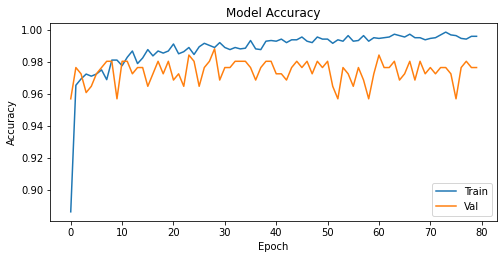

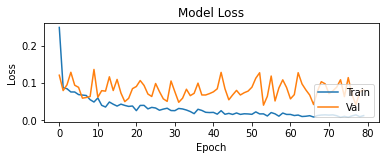

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='lower right')
plt.show()

plt.subplot(2, 1, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='lower right')
plt.show()

In [ ]:
test_accuracy = model.evaluate(test_generator)
print('The testing accuracy is :',test_accuracy[1]*100, '%')

9/9 [==============================] - 18s 2s/step - loss: 0.0091 - accuracy: 0.9965
The testing accuracy is : 99.6515691280365 %


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import itertools

In [ ]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
test_generator.reset()
pred=model.predict_generator(test_generator)

In [ ]:
predictions = pred.copy()
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1

In [ ]:
cm = confusion_matrix(test_generator.classes, predictions)

Confusion matrix, without normalization
[[149   1]
 [  0 137]]


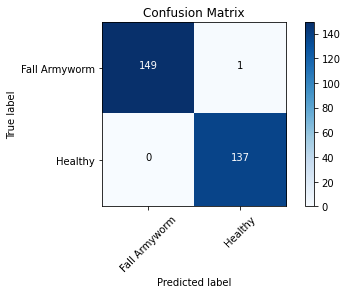

In [ ]:
cm_plot_labels =['Fall Armyworm', 'Healthy']
plot_confusion_matrix(cm=cm, classes = cm_plot_labels, title ='Confusion Matrix')

In [ ]:
print(classification_report(test_generator.classes, predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       150
           1       0.99      1.00      1.00       137

    accuracy                           1.00       287
   macro avg       1.00      1.00      1.00       287
weighted avg       1.00      1.00      1.00       287



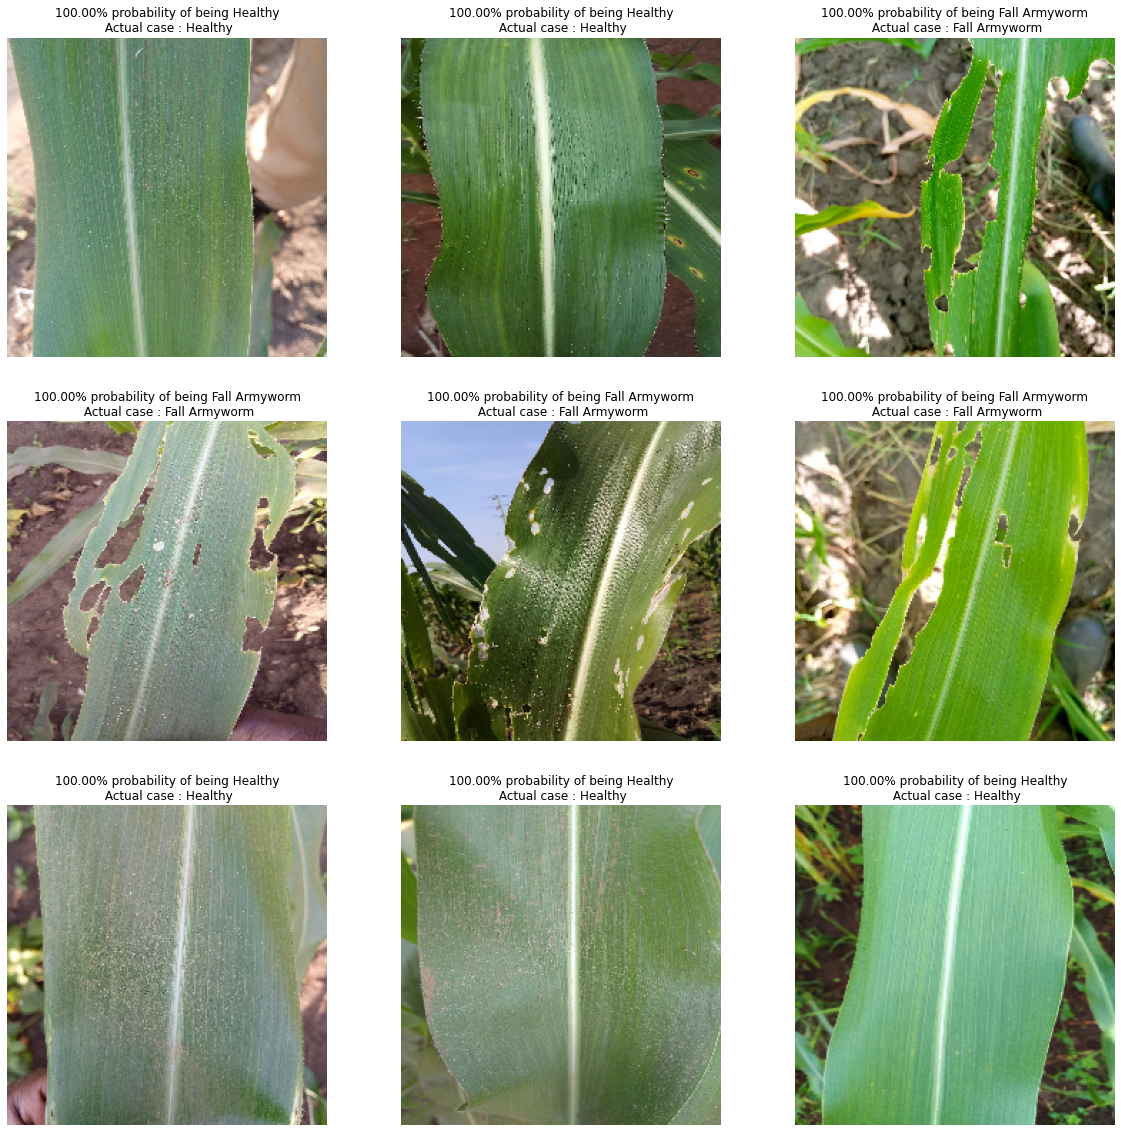

In [ ]:
test_generator.reset()
x=np.concatenate([test_generator.next()[0] for i in range(test_generator.__len__())])
y=np.concatenate([test_generator.next()[1] for i in range(test_generator.__len__())])

#the code above extracts the images from test Data iterator without shuffling the sequence

# x contains image array and y has labels

dic = {0:'Fall Armyworm', 1:'Healthy'}

plt.figure(figsize=(20,20))

for i in range(0+228, 9+228):
    plt.subplot(3, 3, (i-228)+1)
    if pred[i, 0] >= 0.5:
        out = ('{:.2%} probability of being Healthy'.format(pred[i][0]))


    else:
        out = ('{:.2%} probability of being Fall Armyworm'.format(1-pred[i][0]))

    plt.title(out+"\n Actual case : "+ dic.get(y[i]))
    plt.imshow(np.squeeze(x[i]))
    plt.axis('off')
plt.show()

**InceptionV3**

In [ ]:
!pip install inception


     |████████████████████████████████| 58 kB 3.4 MB/s 
  Created wheel for inception: filename=inception-0.0.3-py3-none-any.whl size=6880 sha256=05ce824ca1ca2fecbfea99ce64f93cb961a88d95817c961425cb73de5cd24a32
  Stored in directory: /root/.cache/pip/wheels/f5/53/30/fe2172262b53ab331af29fdd82b649b884dc2fd4e2c3225a91
Successfully built inception


In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range = 15,
    rescale = 1.0/255,
    shear_range = 0.1,
    zoom_range = 0.2,
    horizontal_flip = True,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
 )

test_datagen = ImageDataGenerator(rescale = 1./255)

val_datagen = ImageDataGenerator(
    rotation_range = 15,
    rescale = 1.0/255,
    shear_range = 0.1,
    zoom_range = 0.2,
    horizontal_flip = True,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
 )

Image_size = (150,150)
Batch_size = 32

train_generator = train_datagen.flow_from_dataframe(
        train,
        directory = None,
        x_col = "images",
        y_col = "Class_Name",
        target_size = Image_size,
        class_mode = "binary",
        batch_size = Batch_size,
        color_mode = "rgb"
)


test_generator = test_datagen.flow_from_dataframe(
         test,
         directory = None,
         x_col = "images",
         y_col = "Class_Name",
         target_size = Image_size,
         class_mode ="binary",
         batch_size = Batch_size,
         color_mode = "rgb",
        shuffle = False

 )


val_generator = val_datagen.flow_from_dataframe(
        val,
        directory = None,
        x_col = "images",
        y_col = "Class_Name",
        target_size = Image_size,
        class_mode = "binary",
        batch_size = Batch_size,
        color_mode = "rgb"

)


Found 2322 validated image filenames belonging to 2 classes.
Found 287 validated image filenames belonging to 2 classes.
Found 259 validated image filenames belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
pretrained_model = InceptionV3(input_shape = (150, 150, 3), include_top = False, weights = 'imagenet')
pretrained_model.summary()

87924736/87910968 [==============================] - 1s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                      

In [ ]:
for layer in pretrained_model.layers:
    layer.trainable = False

In [ ]:
from tensorflow import keras
from keras import layers
from keras.layers import Dense, Activation, Flatten,Dropout
from keras.models import Model

In [ ]:

model = keras.Sequential([
                          pretrained_model,
                          keras.layers.GlobalAveragePooling2D(),
                          keras.layers.Dense(1024, activation='relu'),
                          keras.layers.Dropout(0.2),
                          keras.layers.Dense(1, activation='sigmoid')])

In [ ]:
import tensorflow as tf


In [ ]:
# Creating a new model with 0.01 learning rate and  optimizer
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.001, momentum = 0.9),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 23,901,985
Trainable params: 2,099,201
Non-trainable params: 21,802,784
____________________________________

In [ ]:
#Training Model
Epochs = 30
steps_per_epoch = train.shape[0]//Batch_size
validation_steps = val.shape[0]//Batch_size



history = model.fit_generator(train_generator,
                              steps_per_epoch = steps_per_epoch,
                              epochs=Epochs,
                              validation_data=val_generator,
                              validation_steps=validation_steps)

Epoch 1/80
72/72 [==============================] - 167s 2s/step - loss: 0.3889 - accuracy: 0.8524 - val_loss: 0.2174 - val_accuracy: 0.8984
Epoch 2/80
72/72 [==============================] - 145s 2s/step - loss: 0.1967 - accuracy: 0.9253 - val_loss: 0.1062 - val_accuracy: 0.9531
Epoch 3/80
72/72 [==============================] - 143s 2s/step - loss: 0.1638 - accuracy: 0.9345 - val_loss: 0.1319 - val_accuracy: 0.9453
Epoch 4/80
72/72 [==============================] - 144s 2s/step - loss: 0.1507 - accuracy: 0.9432 - val_loss: 0.0953 - val_accuracy: 0.9688
Epoch 5/80
72/72 [==============================] - 144s 2s/step - loss: 0.1836 - accuracy: 0.9279 - val_loss: 0.0969 - val_accuracy: 0.9609
Epoch 6/80
72/72 [==============================] - 144s 2s/step - loss: 0.1392 - accuracy: 0.9450 - val_loss: 0.0756 - val_accuracy: 0.9688
Epoch 7/80
72/72 [==============================] - 144s 2s/step - loss: 0.1638 - accuracy: 0.9341 - val_loss: 0.2383 - val_accuracy: 0.8828
Epoch 8/80
72

In [ ]:
model.save('FAW_Detection.h5')

In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model('FAW_Detection.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("FAW_Detection.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp520qir35/assets


INFO:tensorflow:Assets written to: /tmp/tmp520qir35/assets


95530276

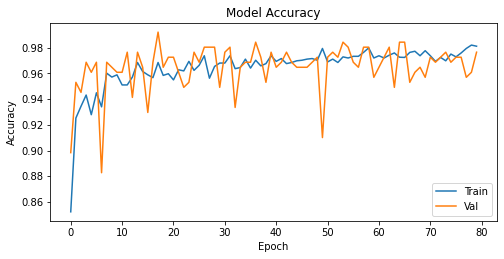

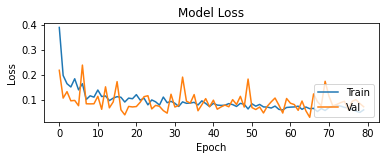

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='lower right')
plt.show()

plt.subplot(2, 1, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='lower right')

In [ ]:
test_accuracy = model.evaluate(test_generator)
print('The testing accuracy is :',test_accuracy[1]*100, '%')

9/9 [==============================] - 17s 2s/step - loss: 0.2643 - accuracy: 0.9268
The testing accuracy is : 92.68292784690857 %


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import itertools

In [ ]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
test_generator.reset()
pred=model.predict_generator(test_generator)

In [ ]:
predictions = pred.copy()
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1

In [ ]:
cm = confusion_matrix(test_generator.classes, predictions)

Confusion matrix, without normalization
[[117  16]
 [  5 149]]


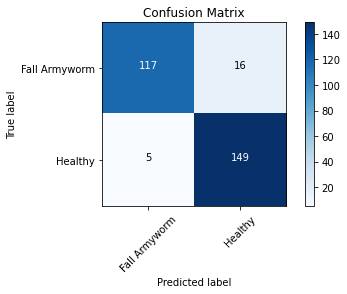

In [ ]:
cm_plot_labels =['Fall Armyworm', 'Healthy']
plot_confusion_matrix(cm=cm, classes = cm_plot_labels, title ='Confusion Matrix')

In [ ]:
print(classification_report(test_generator.classes, predictions))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       133
           1       0.90      0.97      0.93       154

    accuracy                           0.93       287
   macro avg       0.93      0.92      0.93       287
weighted avg       0.93      0.93      0.93       287



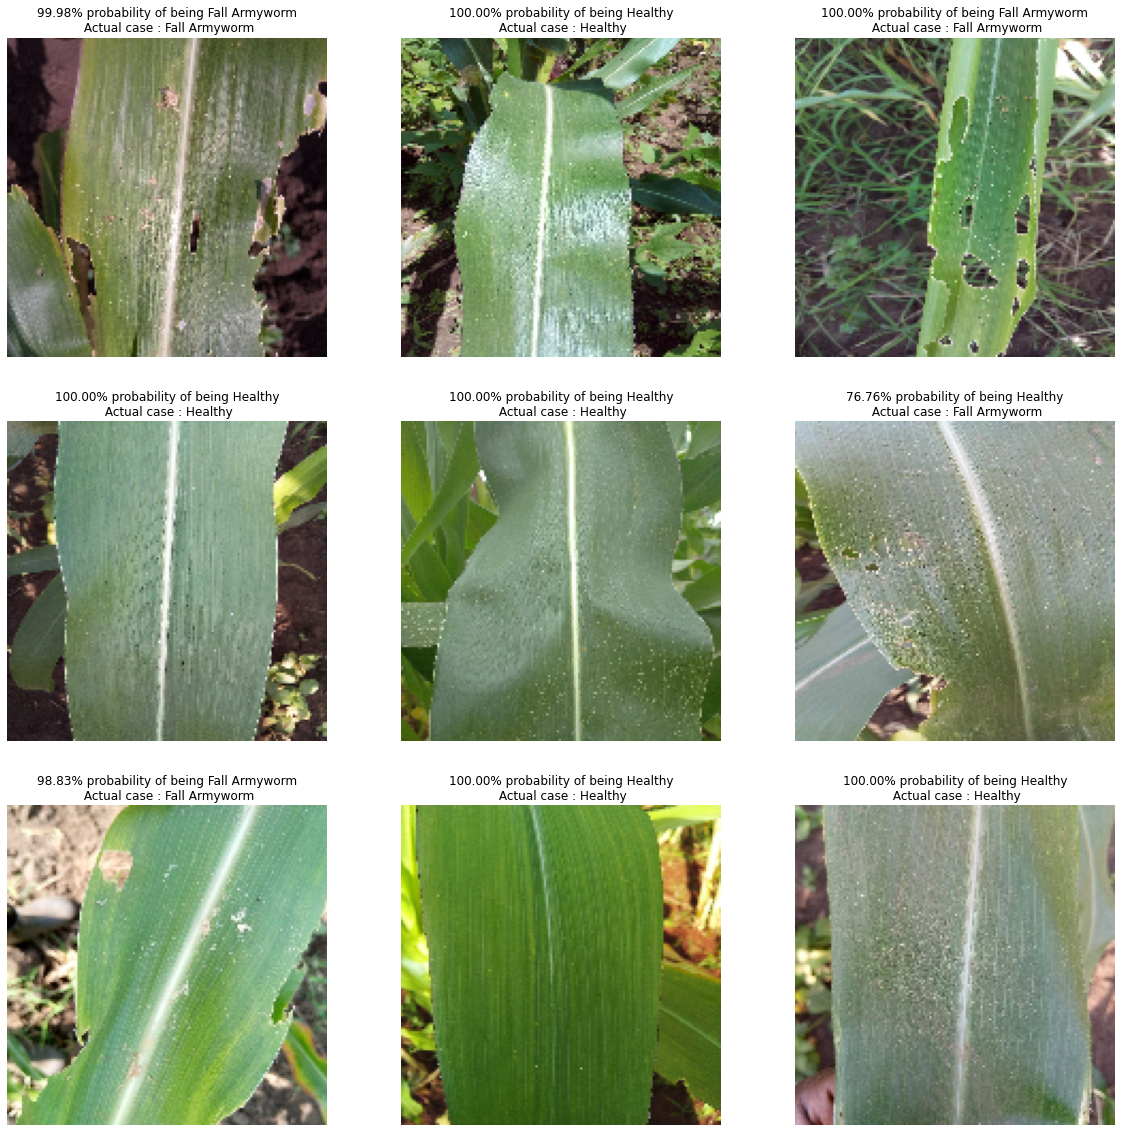

In [ ]:
test_generator.reset()
x=np.concatenate([test_generator.next()[0] for i in range(test_generator.__len__())])
y=np.concatenate([test_generator.next()[1] for i in range(test_generator.__len__())])

#the code above extracts the images from test Data iterator without shuffling the sequence

# x contains image array and y has labels

dic = {0:'Fall Armyworm', 1:'Healthy'}

plt.figure(figsize=(20,20))

for i in range(0+228, 9+228):
    plt.subplot(3, 3, (i-228)+1)
    if pred[i, 0] >= 0.5:
        out = ('{:.2%} probability of being Healthy'.format(pred[i][0]))


    else:
        out = ('{:.2%} probability of being Fall Armyworm'.format(1-pred[i][0]))

    plt.title(out+"\n Actual case : "+ dic.get(y[i]))
    plt.imshow(np.squeeze(x[i]))
    plt.axis('off')
plt.show()

**EfficientNetB0**

In [ ]:
!pip install -U efficientnet

     |████████████████████████████████| 50 kB 5.0 MB/s 


In [ ]:
from tensorflow.keras.applications import EfficientNetB0

In [ ]:
# Specify desired size of image
Image_width =224
Image_height = 224
Image_size = (Image_width,Image_height)
Input_shape = (Image_width, Image_height, 3)



In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range = 15,
    rescale = 1.0/255,
    shear_range = 0.1,
    zoom_range = 0.2,
    horizontal_flip = True,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
 )

test_datagen = ImageDataGenerator(rescale = 1./255)

val_datagen = ImageDataGenerator(
    rotation_range = 15,
    rescale = 1.0/255,
    shear_range = 0.1,
    zoom_range = 0.2,
    horizontal_flip = True,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
 )


Batch_size = 32

train_generator = train_datagen.flow_from_dataframe(
        train,
        directory = None,
        x_col = "images",
        y_col = "Class_Name",
        target_size = Image_size,
        class_mode = "binary",
        batch_size = Batch_size,
        color_mode = "rgb"
)


test_generator = test_datagen.flow_from_dataframe(
         test,
         directory = None,
         x_col = "images",
         y_col = "Class_Name",
         target_size = Image_size,
         class_mode ="binary",
         batch_size = Batch_size,
         color_mode = "rgb",
        shuffle = False

 )


val_generator = val_datagen.flow_from_dataframe(
        val,
        directory = None,
        x_col = "images",
        y_col = "Class_Name",
        target_size = Image_size,
        class_mode = "binary",
        batch_size = Batch_size,
        color_mode = "rgb"

)


Found 2322 validated image filenames belonging to 2 classes.
Found 287 validated image filenames belonging to 2 classes.
Found 259 validated image filenames belonging to 2 classes.


In [ ]:

# Loading Model
pretrained_model = EfficientNetB0(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')
pretrained_model.summary()

16719872/16705208 [==============================] - 1s 0us/step
Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (Zero

In [ ]:
for layer in pretrained_model.layers:
    layer.trainable = False

In [ ]:
from keras import layers
from keras.layers import Dense, Activation, Flatten,Dropout,GlobalAveragePooling2D
from keras.models import Model



In [ ]:
model = keras.Sequential([
                          pretrained_model,
                          keras.layers.GlobalAveragePooling2D(),
                          keras.layers.Dense(1024, activation='relu'),
                          keras.layers.Dropout(0.2),
                          keras.layers.Dense(1, activation='sigmoid')])

In [ ]:
import tensorflow as tf

In [ ]:
# Creating a new model with 0.01 learning rate and  optimizer
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.01, momentum = 0.9),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1024)              1311744   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 5,362,340
Trainable params: 1,312,769
Non-trainable params: 4,049,571
______________________________________

In [ ]:
#Training Model
Epochs = 80
steps_per_epoch = train.shape[0]//Batch_size
validation_steps = val.shape[0]//Batch_size



history = model.fit_generator(train_generator,
                              steps_per_epoch = steps_per_epoch,
                              epochs=Epochs,
                              validation_data=val_generator,
                              validation_steps=validation_steps)

Epoch 1/80
72/72 [==============================] - 113s 1s/step - loss: 0.6964 - accuracy: 0.4882 - val_loss: 0.6850 - val_accuracy: 0.5742
Epoch 2/80
72/72 [==============================] - 91s 1s/step - loss: 0.6950 - accuracy: 0.5052 - val_loss: 0.6840 - val_accuracy: 0.5742
Epoch 3/80
72/72 [==============================] - 90s 1s/step - loss: 0.6958 - accuracy: 0.4978 - val_loss: 0.6871 - val_accuracy: 0.5859
Epoch 4/80
72/72 [==============================] - 90s 1s/step - loss: 0.6954 - accuracy: 0.4991 - val_loss: 0.6838 - val_accuracy: 0.5820
Epoch 5/80
72/72 [==============================] - 89s 1s/step - loss: 0.6953 - accuracy: 0.4965 - val_loss: 0.6890 - val_accuracy: 0.5781
Epoch 6/80
72/72 [==============================] - 90s 1s/step - loss: 0.6951 - accuracy: 0.4961 - val_loss: 0.6943 - val_accuracy: 0.4219
Epoch 7/80
72/72 [==============================] - 89s 1s/step - loss: 0.6950 - accuracy: 0.5197 - val_loss: 0.6814 - val_accuracy: 0.5781
Epoch 8/80
72/72 [=

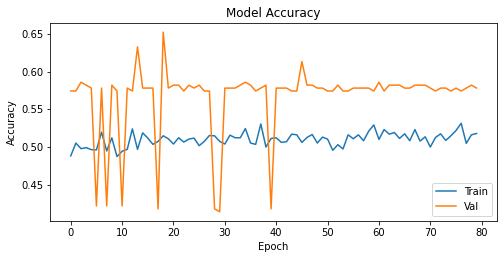

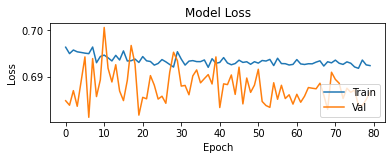

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='lower right')
plt.show()

plt.subplot(2, 1, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='lower right')

In [ ]:
test_accuracy = model.evaluate(test_generator)
print('The testing accuracy is :',test_accuracy[1]*100, '%')

9/9 [==============================] - 14s 2s/step - loss: 0.6969 - accuracy: 0.4564
The testing accuracy is : 45.644599199295044 %


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import itertools

In [ ]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
test_generator.reset()
pred=model.predict_generator(test_generator)

In [ ]:
predictions = pred.copy()
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1

In [ ]:
cm = confusion_matrix(test_generator.classes, predictions)

Confusion matrix, without normalization
[[  0 156]
 [  0 131]]


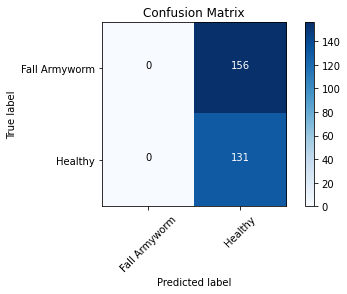

In [ ]:
cm_plot_labels =['Fall Armyworm', 'Healthy']
plot_confusion_matrix(cm=cm, classes = cm_plot_labels, title ='Confusion Matrix')

In [ ]:
print(classification_report(test_generator.classes, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       156
           1       0.46      1.00      0.63       131

    accuracy                           0.46       287
   macro avg       0.23      0.50      0.31       287
weighted avg       0.21      0.46      0.29       287



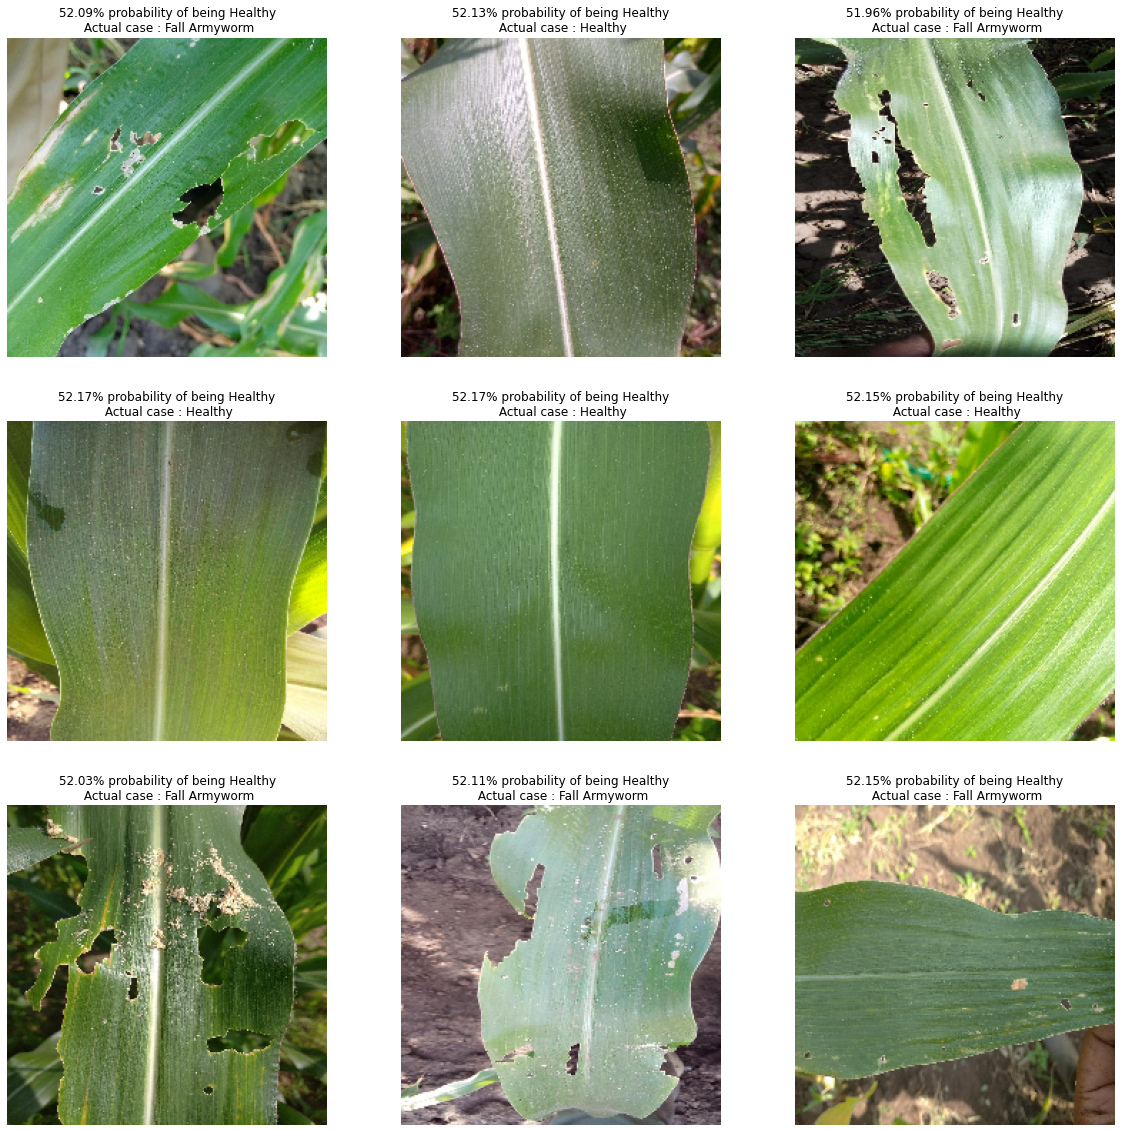

In [ ]:
test_generator.reset()
x=np.concatenate([test_generator.next()[0] for i in range(test_generator.__len__())])
y=np.concatenate([test_generator.next()[1] for i in range(test_generator.__len__())])

#the code above extracts the images from test Data iterator without shuffling the sequence

# x contains image array and y has labels

dic = {0:'Fall Armyworm', 1:'Healthy'}

plt.figure(figsize=(20,20))

for i in range(0+228, 9+228):
    plt.subplot(3, 3, (i-228)+1)
    if pred[i, 0] >= 0.5:
        out = ('{:.2%} probability of being Healthy'.format(pred[i][0]))


    else:
        out = ('{:.2%} probability of being Fall Armyworm'.format(1-pred[i][0]))

    plt.title(out+"\n Actual case : "+ dic.get(y[i]))
    plt.imshow(np.squeeze(x[i]))
    plt.axis('off')
plt.show()

In [4]:
# Provided training logs (time per epoch in seconds)
epoch_times =training_times = [172, 164, 164, 162, 163, 163, 162, 161, 161, 160,
                   162, 161, 162, 160, 160, 160, 161, 160, 162, 160,
                   159, 160, 161, 162, 160, 161, 161, 161, 160, 160,
                   160, 159, 159, 159, 162, 160, 160, 161, 157, 155,
                   159, 156, 154, 155, 154, 153, 152, 157, 156, 155,
                   155, 156, 156, 157, 156, 155, 155, 155, 155, 155,
                   155, 156, 156, 156, 156, 156, 158, 157, 159, 158]

# Calculate total training time in seconds
total_training_time_seconds = sum(epoch_times)

# Convert to minutes
total_training_time_minutes = total_training_time_seconds / 60

print(f"Total training time: {total_training_time_minutes:.2f} minutes")


Total training time: 185.17 minutes


In [3]:
# Provided training logs (time per epoch in seconds)
epoch_times = training_times = [108, 90, 99, 88, 87, 88, 88, 89, 88, 91,
                   90, 90, 90, 89, 89, 89, 89, 89, 89, 89,
                   89, 89, 88, 90, 89, 88, 88, 88, 88, 88,
                   90, 90, 90, 90, 90, 90, 90, 89, 88, 90,
                   91, 90, 88, 91, 90, 90, 91, 91, 92, 90,
                   91, 91, 93, 91, 91, 90, 92, 91, 91, 92,
                   90, 91, 91, 91, 91, 90, 90, 90, 91, 91,
                   91, 92, 90, 91, 91, 90, 92, 91, 91, 92,
                   90, 91, 91, 91, 90, 90, 90, 90, 89, 88,
                   89, 89, 89, 89, 89, 89, 89, 88, 88, 88]

# Calculate total training time in seconds
total_training_time_seconds = sum(epoch_times)

# Convert to minutes
total_training_time_minutes = total_training_time_seconds / 60

print(f"Total training time: {total_training_time_minutes:.2f} minutes")


Total training time: 150.20 minutes


In [5]:
# Provided training logs (time per epoch in seconds)
epoch_times = training_times = training_time_per_epoch = [
    167, 145, 143, 144, 144, 144, 144, 145, 143, 143,
    143, 144, 144, 144, 144, 143, 146, 144, 144, 143,
    143, 144, 143, 143, 143, 144, 143, 144, 144, 146,
    144, 144, 144, 143, 143, 143, 143, 143, 144, 143,
    143, 143, 143, 143, 145, 143, 143, 143, 143, 143,
    143, 144, 144, 144, 144, 143, 143, 143, 143, 143,
    143, 142, 143, 143, 143, 143, 143, 143, 143, 143,
    143, 143, 143, 142, 142, 142, 142, 142, 143, 142,
    142, 142, 142, 143, 142, 143, 142, 143, 142, 142,
    143, 142, 142, 142, 142, 142, 143, 142, 142, 143
]


# Calculate total training time in seconds
total_training_time_seconds = sum(epoch_times)

# Convert to minutes
total_training_time_minutes = total_training_time_seconds / 60

print(f"Total training time: {total_training_time_minutes:.2f} minutes")


Total training time: 238.95 minutes
